# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [22]:
# Code Here
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [23]:
penguins["species"]
pd.get_dummies(penguins[["species"]])

,species_Adelie,species_Chinstrap,species_Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
339,False,True,False
340,False,True,False
341,False,True,False
342,False,True,False


In [24]:
enc = OneHotEncoder()
enc.fit(penguins[["species"]]) ## this is where robot looks at data set and learns categories of species variable
enc.transform(penguins[["species"]]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(penguins[["bill_length_mm"]])

array([[-0.88449874],
       [-0.81112573],
       [-0.66437972],
       [        nan],
       [-1.32473679],
       [-0.84781224],
       [-0.92118525],
       [-0.86615549],
       [-1.80166135],
       [-0.35254443],
       [-1.12296102],
       [-1.12296102],
       [-0.5176337 ],
       [-0.976215  ],
       [-1.70994508],
       [-1.34308004],
       [-0.95787175],
       [-0.26082817],
       [-1.74663159],
       [ 0.38118565],
       [-1.12296102],
       [-1.14130427],
       [-1.47148281],
       [-1.04958801],
       [-0.9395285 ],
       [-1.58154232],
       [-0.60934996],
       [-0.62769321],
       [-1.10461777],
       [-0.62769321],
       [-0.81112573],
       [-1.23302053],
       [-0.81112573],
       [-0.5543202 ],
       [-1.37976655],
       [-0.86615549],
       [-0.9395285 ],
       [-0.31585793],
       [-1.15964752],
       [-0.75609598],
       [-1.3614233 ],
       [-0.57266346],
       [-1.45313956],
       [ 0.03266386],
       [-1.26970704],
       [-0

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [26]:
penguins.head()
penguins = penguins.dropna()

In [27]:
# Code Here
y = penguins[['bill_depth_mm']]
X = penguins[["bill_length_mm"]]
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
lr_fit = lr.fit(X_train, y_train)
train_preds = lr_fit.predict(X_train)
test_preds = lr_fit.predict(X_test)



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_train, train_preds)



0.05881237948127793

In [ ]:
r2_score(y_test, test_preds)

0.028720368132020724

In [ ]:
mean_squared_error(y_train, train_preds)

3.585141080416757

In [ ]:
mean_squared_error(y_test, test_preds)

3.910891300356645

In [ ]:
#quadratic
X["x_sq"] = X[["bill_length_mm"]]**2
X.head()

<ipython-input-13-25ed86963b70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["x_sq"] = X[["bill_length_mm"]]**2


,bill_length_mm,x_sq
0,39.1,1528.81
1,39.5,1560.25
2,40.3,1624.09
4,36.7,1346.89
5,39.3,1544.49


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In [ ]:

X1 = X[["bill_length_mm", "x_sq"]]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25)
lr_fit = lr.fit(X_train, y_train)
train_preds = lr_fit.predict(X_train)
test_preds = lr_fit.predict(X_test)
r2_score(y_train, train_preds)


0.10092028152989863

In [ ]:
r2_score(y_test, test_preds)

0.11084139214043498

In [ ]:
mean_squared_error(y_train, train_preds)

3.419602385018175

In [ ]:
mean_squared_error(y_test, test_preds)

3.543976270701371

In [ ]:
X["X_cube"] = X[["bill_length_mm"]]**3
X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lr_fit = lr.fit(X_train, y_train)
train_preds = lr_fit.predict(X_train)
test_preds = lr_fit.predict(X_test)
r2_score(y_train, train_preds)


<ipython-input-18-bca18a400501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["X_cube"] = X[["bill_length_mm"]]**3


0.12537572346770864

In [ ]:
r2_score(y_test, test_preds)

0.14781117326191318

In [ ]:
mean_squared_error(y_train, train_preds)

3.3808479316597326

In [ ]:
mean_squared_error(y_test, test_preds)

3.287713333589936

In [39]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
import pandas as pd
penguins.head()
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

Let's use bill_length_mm to predict bill_depth_mm. Prepare your data and fit the following models on the entire dataset:

Simple linear regression (e.g. straight-line) model
Quadratic (degree 2 polynomial) model
Cubic (degree 3 polynomial) model
Degree 10 polynomial model
Make predictions for each model and plot your fitted models on the scatterplot.

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
penguins = penguins.dropna()
X = penguins[["bill_length_mm"]]
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

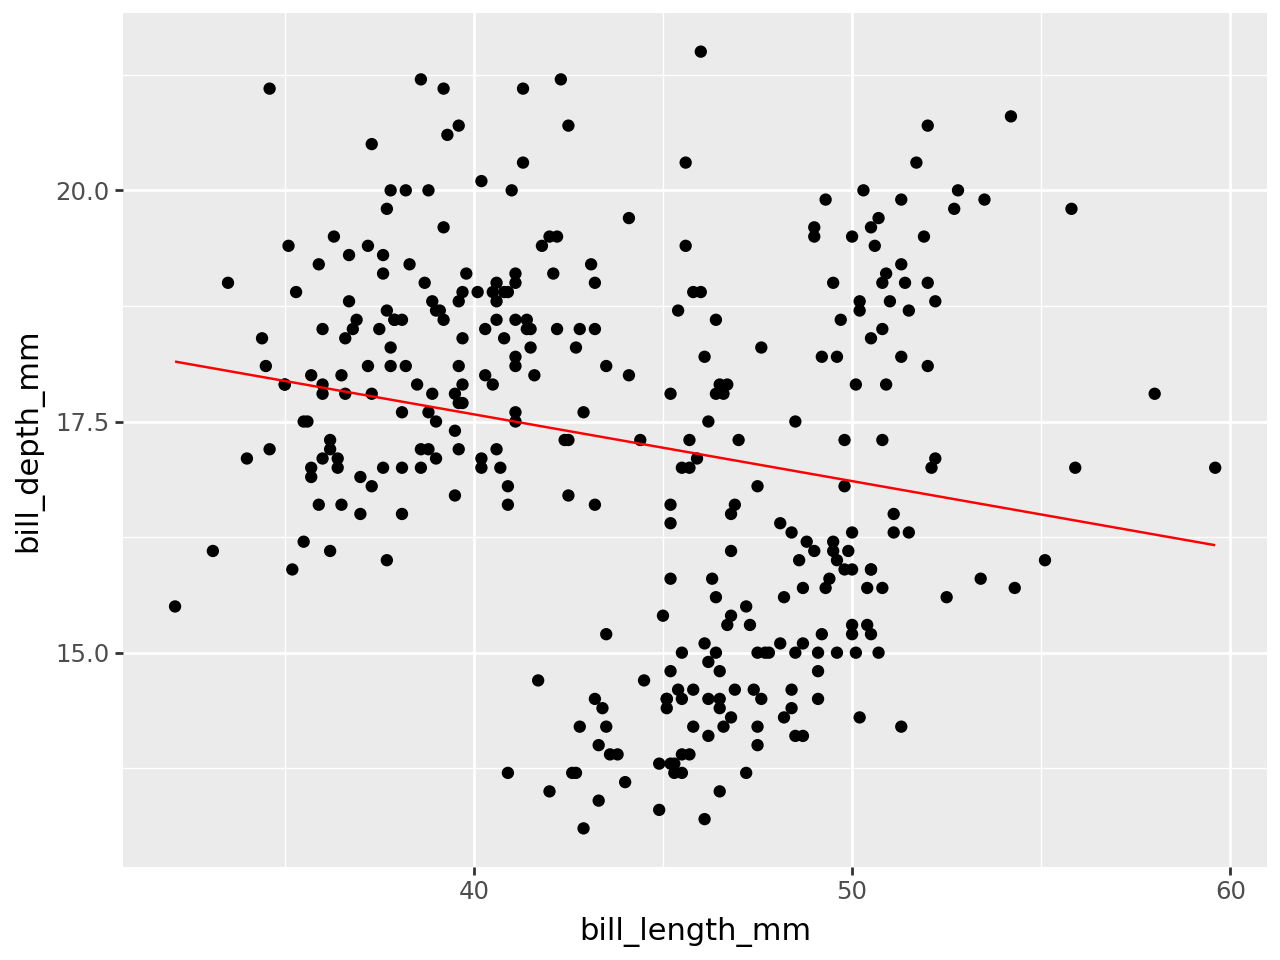

In [64]:

ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["bill_length_mm"])

    ],
  remainder = "drop")

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_pipeline

model_fitted = lr_pipeline.fit(X_train, y_train)

test_pred = model_fitted.predict(X_test)
train_pred = model_fitted.predict(X_train)

preds = model_fitted.predict(X)

from plotnine import *

(
    ggplot(penguins)
    + geom_point(aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_line(aes(x="bill_length_mm", y=preds), color="red")
)


In [66]:
mse = mean_squared_error(y, preds)
mse

3.682682678183439

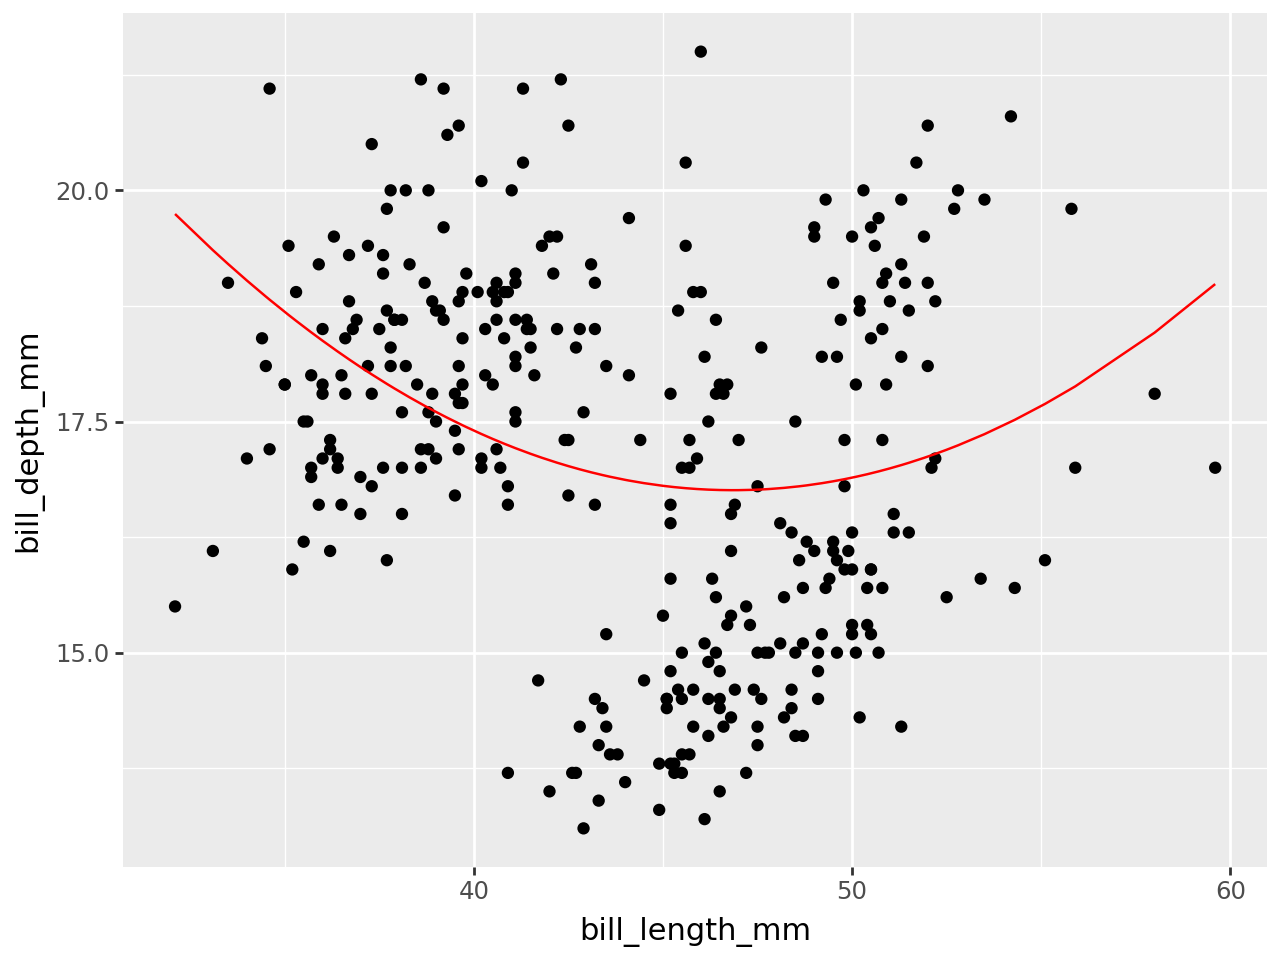

In [67]:
ct = ColumnTransformer(
  [
    ("poly", PolynomialFeatures(degree = 2), ["bill_length_mm"]),
    ("standardize", StandardScaler(), ["bill_length_mm"]) # Apply StandardScaler after PolynomialFeatures
    ],
  remainder = "drop")

# ... (rest of the pipeline remains the same)

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_pipeline

model_fitted = lr_pipeline.fit(X_train, y_train)

test_pred = model_fitted.predict(X_test)
train_pred = model_fitted.predict(X_train)

preds = model_fitted.predict(X)

(
    ggplot(penguins)
    + geom_point(aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_line(aes(x="bill_length_mm", y=preds), color="red")
)



In [68]:
mse2 = mean_squared_error(y, preds)
mse2

3.4588295185974176

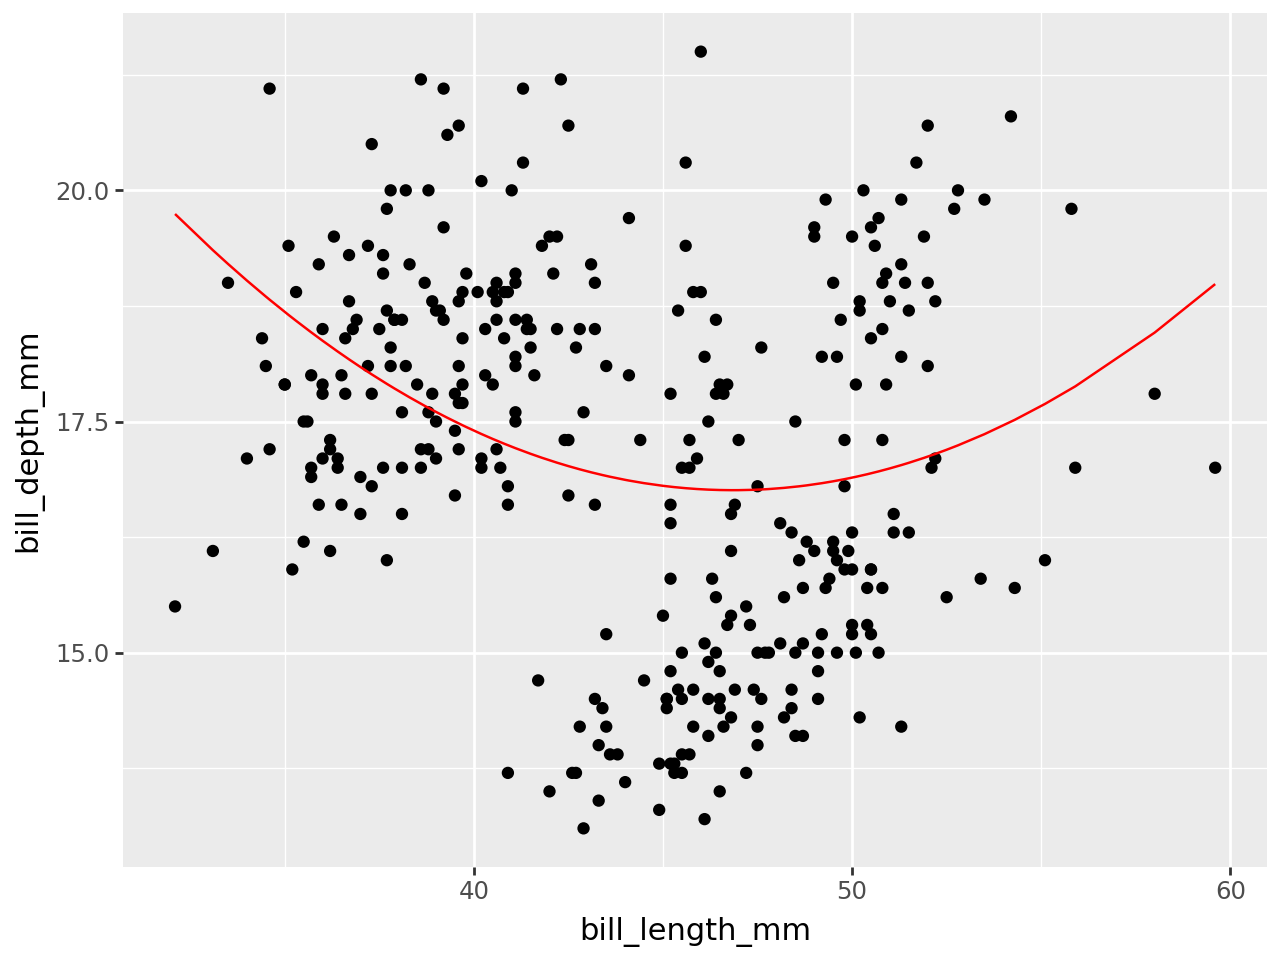

In [69]:
ct = ColumnTransformer(
  [
    ("poly", PolynomialFeatures(degree = 2), ["bill_length_mm"]),
    ("standardize", StandardScaler(), ["bill_length_mm"]) # Apply StandardScaler after PolynomialFeatures
    ],
  remainder = "drop")

# ... (rest of the pipeline remains the same)

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_pipeline

model_fitted = lr_pipeline.fit(X_train, y_train)

test_pred = model_fitted.predict(X_test)
train_pred = model_fitted.predict(X_train)

preds = model_fitted.predict(X)

(
    ggplot(penguins)
    + geom_point(aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_line(aes(x="bill_length_mm", y=preds), color="red")
)


In [70]:
mse3 = mean_squared_error(y, preds)
mse3

3.4588295185974176

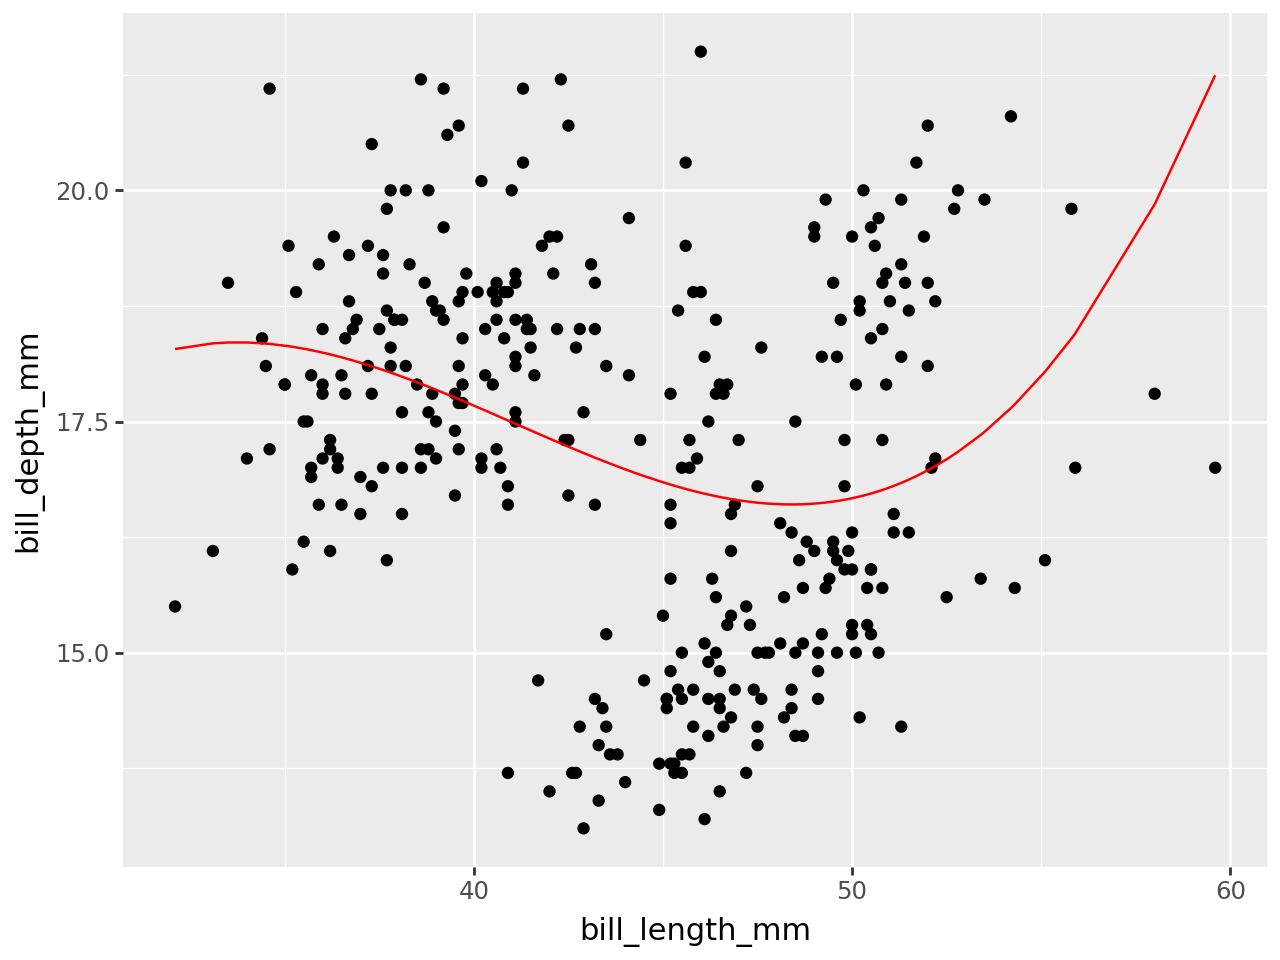

In [71]:
ct = ColumnTransformer(
  [
    ("poly", PolynomialFeatures(degree = 3), ["bill_length_mm"]),
    ("standardize", StandardScaler(), ["bill_length_mm"]) # Apply StandardScaler after PolynomialFeatures
    ],
  remainder = "drop")

# ... (rest of the pipeline remains the same)

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_pipeline

model_fitted = lr_pipeline.fit(X_train, y_train)

test_pred = model_fitted.predict(X_test)
train_pred = model_fitted.predict(X_train)

preds = model_fitted.predict(X)

(
    ggplot(penguins)
    + geom_point(aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_line(aes(x="bill_length_mm", y=preds), color="red")
)


In [72]:
mse4 = mean_squared_error(y, preds)
mse4

3.357908589522799

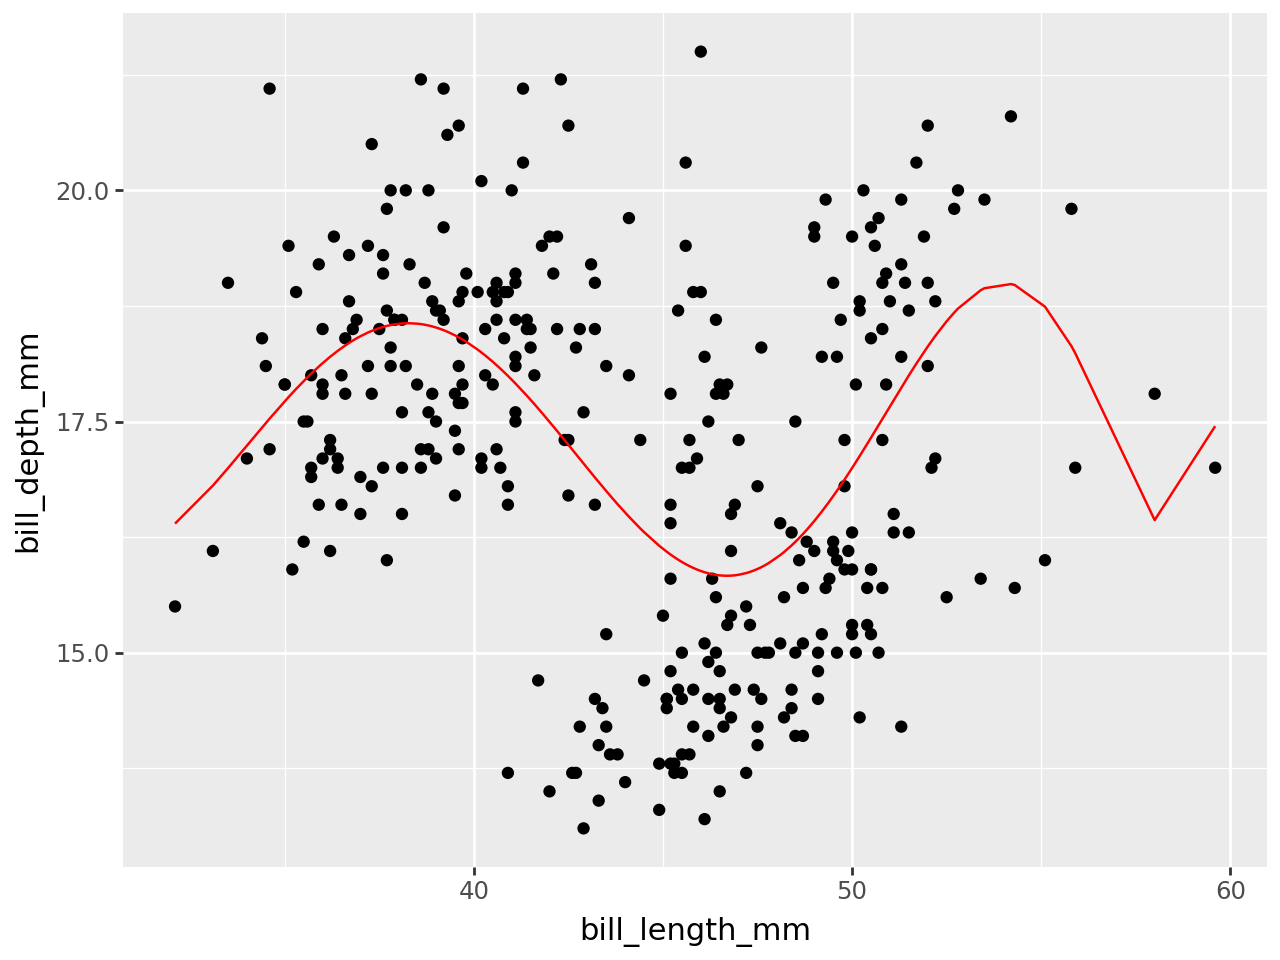

In [74]:
ct = ColumnTransformer(
  [
    ("poly", PolynomialFeatures(degree = 10), ["bill_length_mm"]),
    ("standardize", StandardScaler(), ["bill_length_mm"]) # Apply StandardScaler after PolynomialFeatures
    ],
  remainder = "drop")

# ... (rest of the pipeline remains the same)

#create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)
lr_pipeline

model_fitted = lr_pipeline.fit(X_train, y_train)

test_pred = model_fitted.predict(X_test)
train_pred = model_fitted.predict(X_train)

preds = model_fitted.predict(X)

(
    ggplot(penguins)
    + geom_point(aes(x="bill_length_mm", y="bill_depth_mm"))
    + geom_line(aes(x="bill_length_mm", y=preds), color="red")
)


In [75]:
mse5 = mean_squared_error(y, preds)
mse5

2.790352220948847

Are any of the models above, underfitting the data?

 If so, which ones and how can you tell?

Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
Which of the above models do you think fits the data best and why?

All the above models are underfitting as none of the models truly are great at predicting. You can tell they are underfitting by looking at the lines we can see that.  

The best one would be the last model as that has the lowest MSE values.

None of them are overfitting largely and this can easily be seen by the line of best fit which clearly still has many residuals.